<a href="https://colab.research.google.com/github/carbo6ufmg/trabalho_icd/blob/main/notebook_trabalho_icd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [32]:
plt.style.use('seaborn-colorblind')

plt.rcParams['figure.figsize']  = (15, 9)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [33]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [34]:
plt.ion()

In [35]:
URL = "https://raw.githubusercontent.com/carbo6ufmg/trabalho_icd/main/healthcare-dataset-stroke-data.csv"

In [36]:
df = pd.read_csv(URL)

In [37]:
from sklearn.impute import KNNImputer

var_names = list(df)

imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(df[['bmi', 'age', 'hypertension']])
df_filled = pd.DataFrame(df_filled,columns=['bmi', 'age', 'hypertension'])
df.bmi = df_filled.bmi

In [38]:
df = df.dropna()
df['age'] = df['age'].astype(int)
df=df[df["gender"]!="Other"]
#df=df.loc[df['age']>=18]

In [39]:
df.head(50)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,32.05,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
5,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.00,formerly smoked,1
6,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.40,never smoked,1
7,10434,Female,69,0,0,No,Private,Urban,94.39,22.80,never smoked,1
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,26.90,Unknown,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.20,Unknown,1


# Análise exploratória

## Qual a frequência de Acidente Vascular Cerebral por idade?


In [40]:
df_stroke = df.loc[df['stroke'] == 1]

Text(0, 0.5, 'Número de AVC')

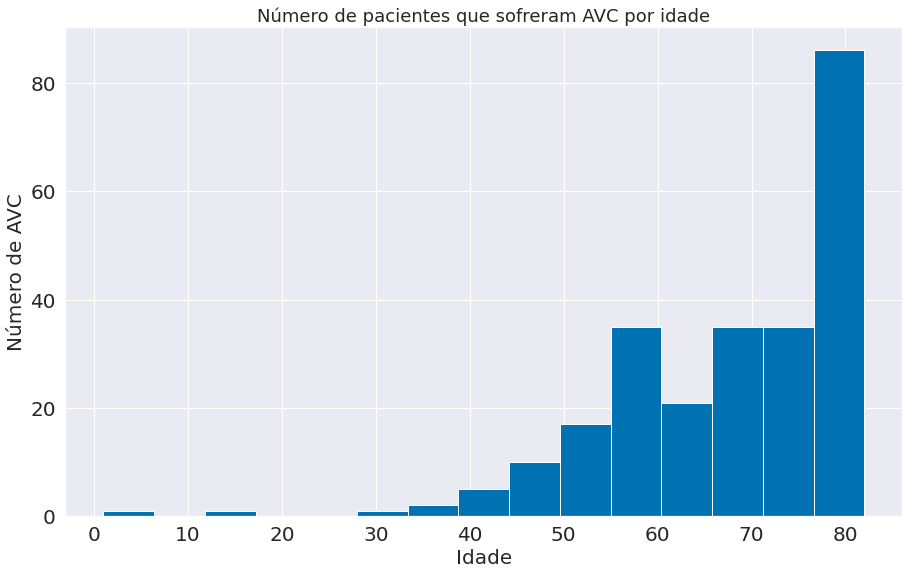

In [41]:
# falta fazer relação de gênero e idade de stroke
df_stroke.hist('age',bins = 15)
# Título do plot
plt.title("Número de pacientes que sofreram AVC por idade", fontsize=18)
# Nome do eixo x
plt.xlabel('Idade')
# Nome do eixo y
plt.ylabel('Número de AVC')

Percebe-se que a incidência de AVC possui uma maior concentração nos grupos de 55 até 80 anos. Além disso, devido a uma procura maior por parte de profissonais de saúde por dados referentes a uma faixa etária mais elevadas, dados de indivíduos com idade inferior a 30 serão desconsiderados.

## Qual a incidência de stroke por gênero

In [42]:
stroke_gender = (df_stroke.groupby('gender')
              .agg({'id': 'count'})
              .reset_index()
              .rename(columns={'id':'n_strokes'}))

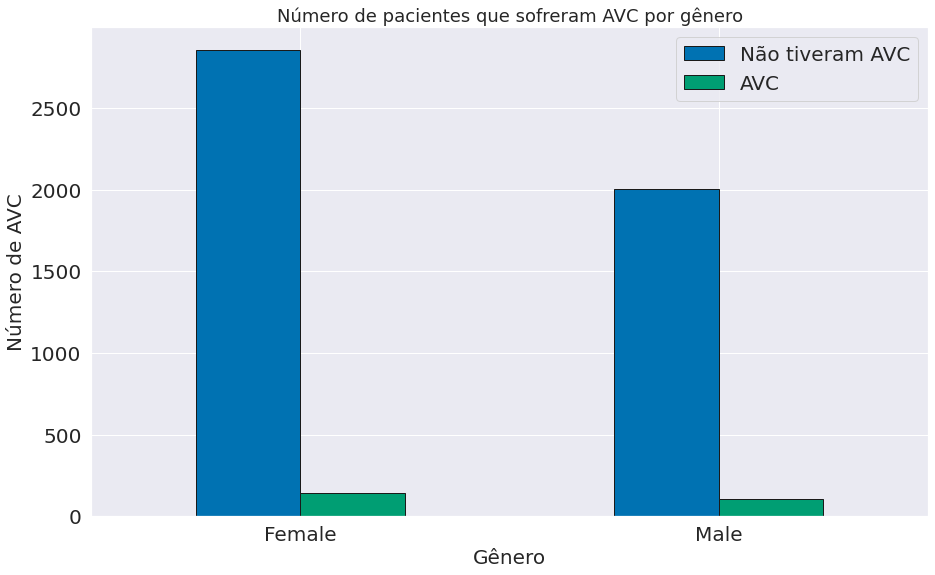

In [43]:
gender_stroke = df.groupby(["gender","stroke"])[["stroke"]].count()
pd.crosstab(df['gender'],df['stroke']).plot.bar(edgecolor='k',rot = 0)
# Título do plot
plt.title("Número de pacientes que sofreram AVC por gênero", fontsize=18)
# Nome do eixo x
plt.xlabel('Gênero')
# Nomes da legenda
plt.legend(['Não tiveram AVC', 'AVC'])
# Nome do eixo y
plt.ylabel('Número de AVC')
plt.show()


Através da análise acima, a ausência de uma variação perceptível entre a porcentagem de homens e mulheres no acometimento de AVC pode guiar a uma possível conclusão de que gênero não interfere no acometimento de AVC. Observa também que a base de dados possui um expressivo número de indivíduos do gênero feminino a mais que indivíduos do gênero oposto.

## Média de Glicose e Índice de Massa Corporal

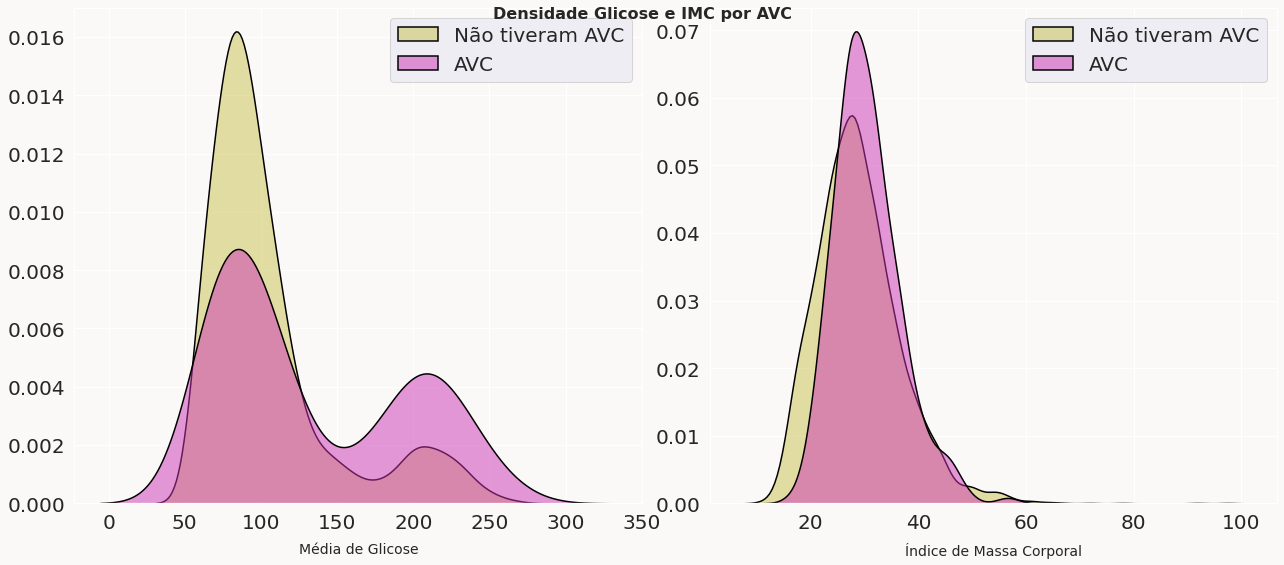

In [44]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize = (18,8))
fig.patch.set_facecolor('#faf9f7')

for i in (ax2, ax3):
    i.set_facecolor('#faf9f7')

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 0],
    ax = ax2,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['avg_glucose_level'][df['stroke'] == 1],
    ax = ax2,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax2.legend(['Não tiveram AVC', 'AVC'])
ax2.set_xlabel('Média de Glicose', fontsize = 14, labelpad = 10)
ax2.set_ylabel('')

sns.kdeplot(
    df['bmi'][df['stroke'] == 0],
    ax = ax3,
    color = "#c8c14f",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

sns.kdeplot(
    df['bmi'][df['stroke'] == 1],
    ax = ax3,
    color = "#cd34b5",
    shade = True,
    alpha = 0.5,
    linewidth = 1.5,
    ec = 'black'
)

ax3.legend(['Não tiveram AVC', 'AVC'])
ax3.set_xlabel('Índice de Massa Corporal', fontsize = 14, labelpad = 10)
ax3.set_ylabel('')

plt.suptitle('Densidade Glicose e IMC por AVC', fontsize = 16, fontweight = 'bold')

fig.tight_layout()

Analisando os gráficos podemos perceber que o IMC não parece afetar tanto no acometimento de AVC, uma vez que a média dos dois grupos é parecida.
Já a taxa de glicose no sangue parece ter uma maior influência, uma vez que a média dos que tiveram AVC é maior do que a média do grupo que não sofreu AVC.

## Tabagismo

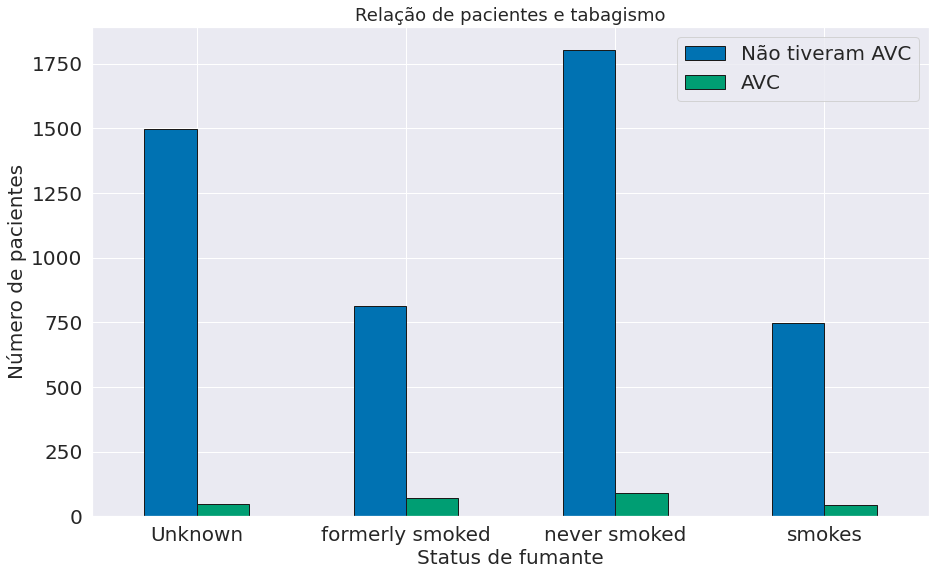

In [45]:
stroke_smoke = df.groupby(["smoking_status","stroke"])[["stroke"]].count()
pd.crosstab(df['smoking_status'],df['stroke']).plot.bar(edgecolor='k',rot = 0)
# Título do plot
plt.title("Relação de pacientes e tabagismo", fontsize=18)
# Nome do eixo x
plt.xlabel('Status de fumante')
# Nomes da legenda
plt.legend(['Não tiveram AVC', 'AVC'])
# Nome do eixo y
plt.ylabel('Número de pacientes')
plt.show()

In [46]:
stroke_smoke_percentage = []
stroke_smoke_percentage.append(len(df_stroke.loc[df_stroke['smoking_status']=='formerly smoked'])/len(df.loc[df['smoking_status']=='formerly smoked']))
stroke_smoke_percentage.append(len(df_stroke.loc[df_stroke['smoking_status']=='never smoked'])/len(df.loc[df['smoking_status']=='never smoked']))
stroke_smoke_percentage.append(len(df_stroke.loc[df_stroke['smoking_status']=='smokes'])/len(df.loc[df['smoking_status']=='smokes']))
stroke_smoke_percentage.append(len(df_stroke.loc[df_stroke['smoking_status']=='Unknown'])/len(df.loc[df['smoking_status']=='Unknown']))

In [47]:
percentage_df = pd.DataFrame(stroke_smoke_percentage, columns=['Percentage'],index=['formerly smoked','never smoked','smokes','Unknown'])

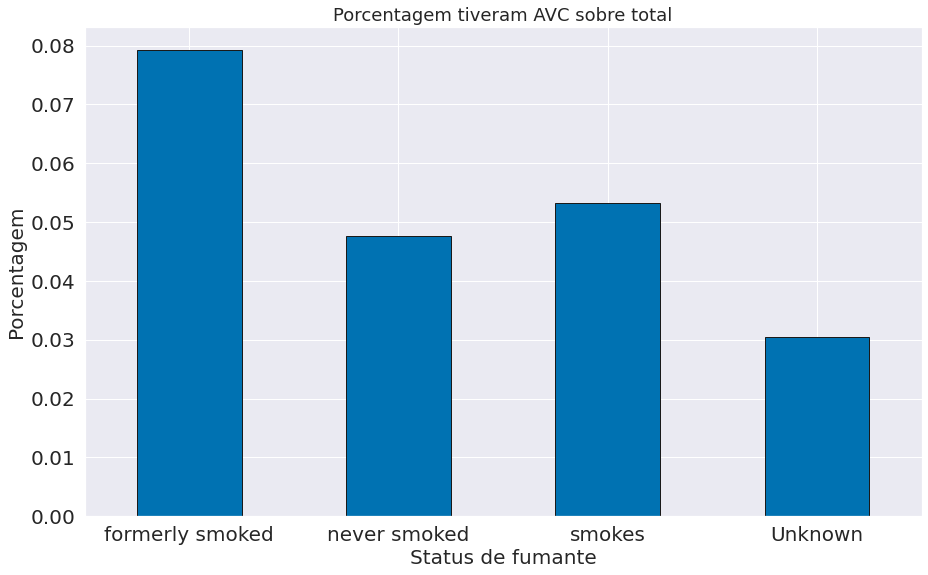

In [48]:
percentage_df.plot.bar(edgecolor='k', rot = 0, legend = False)
# Título do plot
plt.title("Porcentagem tiveram AVC sobre total", fontsize=18)
# Nome do eixo x
plt.xlabel('Status de fumante')
# Nome do eixo y
plt.ylabel('Porcentagem')
plt.show()

Ao enunciar o gráfico, podemos perceber que a média de pessoas que já fumaram ou fumam possui uma pequena porcentagem superior em comparação às que nunca fumaram no acometimento de AVC, sendo essa discrepância muito pequena para direcionar qualquer decisão ainda.

# Testes de Hipótese

## Homens na meia idade apresentam em média maior propensão a AVC do que mulheres?
### H0: média de mulheres que tiveram AVC - média de homens que tiveram AVC = 0 

In [49]:
data = df[df['age'] >=30]

-0.009273533095673955


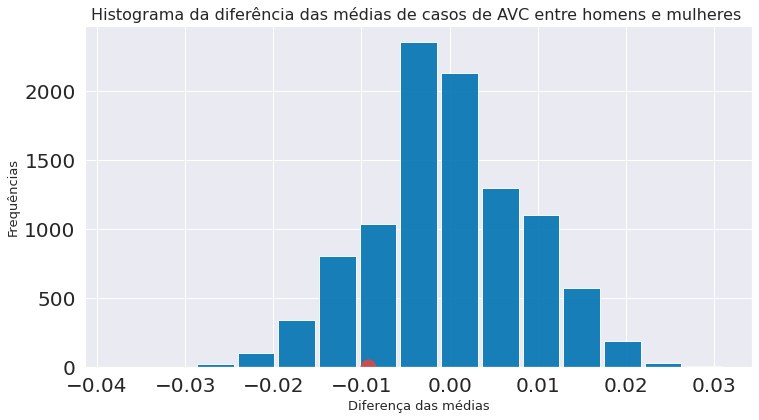

False


In [50]:
def shuffling(data):
  N = 10000
  filtro = data['gender'] == 'Female'
  t_obs = data[filtro]['stroke'].mean() - data[~filtro]['stroke'].mean()
  print(t_obs)
  diffs = np.zeros(N)
  for i in range(N):
    np.random.seed(i)
    np.random.shuffle(filtro.values)
    diffs[i] = data[filtro]['stroke'].mean() - data[~filtro]['stroke'].mean()
  
  critico_inf = np.percentile(diffs, 2.5).round(2)
  critico_sup = np.percentile(diffs, 97.5).round(2)

  if (t_obs>0):
    p = (diffs>t_obs).sum()/diffs.size
  else:
    p = (diffs<t_obs).sum()/diffs.size
  
  fig, ax1 = plt.subplots(1, figsize=(11, 6))
  
  ax1.hist(diffs, alpha=0.9, bins=15, rwidth=0.9)
  ax1.set_xlabel('Diferença das médias', fontsize=13)
  ax1.set_ylabel('Frequências', fontsize=13)
  ax1.set_title('Histograma da diferência das médias de casos de AVC entre homens e mulheres ', fontsize=16)
  plt.plot(t_obs, [0], 'ro', ms=15)
  fig.tight_layout()
  plt.show()
  
  if ((t_obs >= critico_inf) & (t_obs<=critico_sup)):
    return False # Não rejeita hipótese nula
  return True # Rejeita hipótese nula


diffs = shuffling(data)
print(diffs)

Como a hipotese nula não foi rejeitada, não podemos afirmar que indivíduos do gênero masculino de faixa etária média apresentam, em média, maior propensão a AVC ao se comparar com o gênero oposto.

## Pessoas que fumam ou já fumaram apresentam média de AVC igual a pessoas que nunca fumaram?
### H0: média de pessoas que fumam ou já fumaram e tiveram AVC - média de pessoas que nunca fumaram e tiveram AVC = 0

In [51]:
data = data[data['smoking_status'] != 'Unknown']

0.015129578068108808


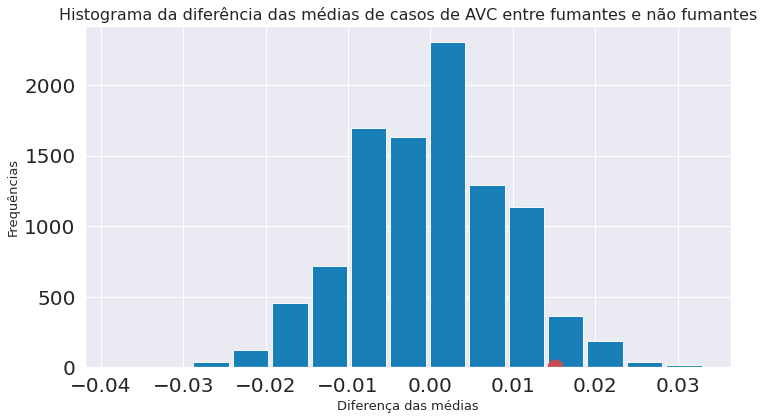

False


In [52]:
def shuffling_smoke(data):
  N = 10000
  filtro = data['smoking_status'] == ('never smoked')
  t_obs = data[~filtro]['stroke'].mean() - data[filtro]['stroke'].mean()
  print(t_obs)
  diffs = np.zeros(N)
  for i in range(N):
    np.random.seed(i)
    np.random.shuffle(filtro.values)
    diffs[i] = data[filtro]['stroke'].mean() - data[~filtro]['stroke'].mean()
  
  critico_inf = np.percentile(diffs, 2.5).round(2)
  critico_sup = np.percentile(diffs, 97.5).round(2)

  if (t_obs>0):
    p = (diffs>t_obs).sum()/diffs.size
  else:
    p = (diffs<t_obs).sum()/diffs.size
  
  fig, ax1 = plt.subplots(1, figsize=(11, 6))

  ax1.hist(diffs, alpha=0.9, bins=15, rwidth=0.9)
  ax1.set_xlabel('Diferença das médias', fontsize=13)
  ax1.set_ylabel('Frequências', fontsize=13)
  ax1.set_title('Histograma da diferência das médias de casos de AVC entre fumantes e não fumantes', fontsize=16)
  plt.plot(t_obs, [0], 'ro', ms=15)
  fig.tight_layout()
  plt.show()
  
  if ((t_obs >= critico_inf) & (t_obs<=critico_sup)):
    return False # Não rejeita hipótese nula
  return True # Rejeita hipótese nula


diffs = shuffling_smoke(data)
print(diffs)

Como a hipotese nula não foi rejeitada, não podemos afirmar que pessoas que fumam ou já fumaram apresentam média de AVC igual a pessoas que nunca fumaram.

## O número de pessoas que fumam é em média maior no Campo do que na Cidade?
###H0: média de pessoas que fumam no campo - média de pessoas que fumam na cidade = 0

In [53]:
data_f = data[data['smoking_status'] != 'Unknown']
fumam = data_f['smoking_status'] != ('never smoked')
data_f['Fumante'] = fumam

In [54]:
def bootstrap_media_fumam():
    N = 10000
    df_rural = data_f[data_f['Residence_type'] == ('Rural')]
    df_urban = data_f[data_f['Residence_type'] == ('Urban')]
    size1 = len(df_rural)
    size2 = len(df_urban)
    values1 = np.zeros(N)
    values2 = np.zeros(N)
    values_diff = np.zeros(N)
    for i in range(N):
        sample1 = df_rural['Fumante'].sample(size1, replace=True, random_state=i)
        sample2 = df_urban['Fumante'].sample(size2, replace=True, random_state=i*3)
        values1[i] = sample1.mean()
        values2[i] = sample2.mean()
        values_diff[i] = sample1.mean() - sample2.mean()
    return values1, values2, values_diff


v_rural, v_urban, v_diff = bootstrap_media_fumam()

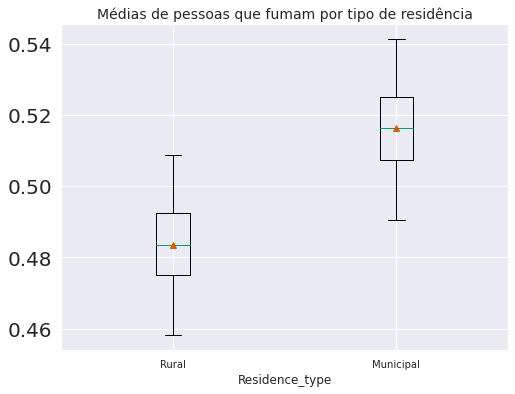

In [55]:
bp_data = [v_rural, v_urban]

plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2], showfliers=False, showmeans=True)
plt.xticks([1,2], ['Rural', 'Municipal'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('Residence_type', fontsize=12)
plt.title('Médias de pessoas que fumam por tipo de residência', fontsize=14)
plt.show()

Observa-se que os bloxpots se cruzam, com evidência de que as médias são iguais. Assim, não podemos afirmar que o número de pessoas que fumam é em média maior no Campo do que na Cidade.

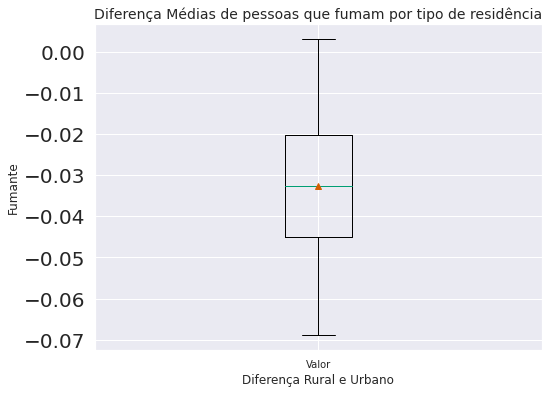

In [56]:
plt.rcParams['figure.figsize']  = (8, 6)

plt.boxplot(v_diff, whis=[2.5, 97.5], showfliers=False, showmeans=True)
plt.xticks([1], ['Valor'], fontsize=10)
plt.ylabel('Fumante', fontsize=12)
plt.xlabel('Diferença Rural e Urbano', fontsize=12)
plt.title('Diferença Médias de pessoas que fumam por tipo de residência', fontsize=14)
plt.show()

Nesse caso, analisamos que o boxplot gerado após o processo de amostragem contém o valor 0, portanto as médias são consideradas iguais.

##  Pessoas com índices glicêmicos elevado tem maior probabilidade de sofrer um AVC comparado com pessoas com glicemia normal ?
### Segundo a World Health Organization os valores esperados de glicose no sangue está entre 70mg/dl e 100mg/dl,assim,  vamos separar as observações entre glicose no sangue maior ou menor 100mg/dl . Disponível em https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380
### H0: média de pessoas com índice glicêmico maior que 100 que tiveram avc - média de pessoas com índice glicêmico menor ou igual a 100 que tiveram avc é igual a 0 .

0.04069452803507381


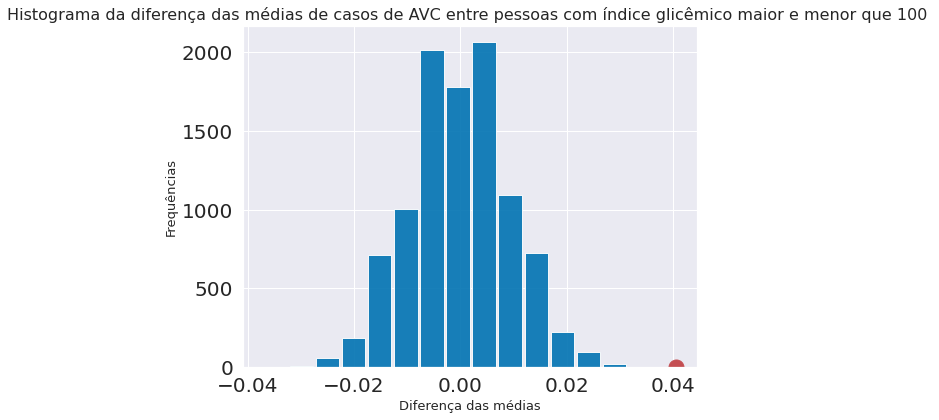

True


In [57]:
def shuffling(data):
  N = 10000
  filtro = data["avg_glucose_level"] >100
  t_obs = data[filtro]['stroke'].mean() - data[~filtro]['stroke'].mean()
  print(t_obs)
  diffs = np.zeros(N)
  for i in range(N):
    np.random.seed(i)
    np.random.shuffle(filtro.values)
    diffs[i] = data[filtro]['stroke'].mean() - data[~filtro]['stroke'].mean()
  
  critico_inf = np.percentile(diffs, 2.5).round(2)
  critico_sup = np.percentile(diffs, 97.5).round(2)

  if (t_obs>0):
    p = (diffs>t_obs).sum()/diffs.size
  else:
    p = (diffs<t_obs).sum()/diffs.size
  
  fig, ax1 = plt.subplots(1, figsize=(11, 6))

  ax1.hist(diffs, alpha=0.9, bins=15, rwidth=0.9)
  ax1.set_xlabel('Diferença das médias', fontsize=13)
  ax1.set_ylabel('Frequências', fontsize=13)
  ax1.set_title('Histograma da diferença das médias de casos de AVC entre pessoas com índice glicêmico maior e menor que 100 ', fontsize=16)
  plt.plot(t_obs, [0], 'ro', ms=15)
  fig.tight_layout()
  plt.show()
  
  if ((t_obs >= critico_inf) & (t_obs<=critico_sup)):
    return False # Não rejeita hipótese nula
  return True # Rejeia hipótese nula


diffs = shuffling(data)
print(diffs)

Como a hipótese nula foi rejeitada, pessoas com índices glicêmicos maior que 100 possuem maior probabilidade de sofrer um AVC comparado com pessoas com glicemia menor que 100.

##  Podemos prever o acontecimento de um AVC em um paciente com base nas comorbidades pré-existentes?
##Hipotese Nula: a média de pessoas que tiveram um avc em todos os grupos são as mesmas , isso indicaria que não é possível prever um avc baseado nas comorbidades.
##Hipotese Alternativa: Podemos prever o acontecimento de um AVC em um paciente com base nas comorbidades pré-existentes.
## Vamos separar a população em 4 grupos , o primeiro grupo é composto de pessoas que são hipertensas e possuem doença do coração, o segundo grupo são pessoas que  são hipertensas mas não possuem doença do coração, o terceiro grupo são pessoas que não são hipertensas mas possuem doença do coração, e o quarto grupo são pessoas que não são hipertensas e não possuem doença do coração

### primeira H0: a média de pessoas que tiveram um avc em todos os grupos são as mesmas , isso indicaria que não é possível prever um avc baseado nas comorbidades.

In [58]:
data = df
def bootstrap_mean(df1, df2,df3,df4 ,column, n=10000):
    size1 = len(df1)
    size2 = len(df2)
    size3 = len(df3)
    size4 = len(df4)
    values1 = np.zeros(n)
    values2 = np.zeros(n)
    values3 = np.zeros(n)
    values4 = np.zeros(n)
    print(size1,size2,size3,size4)
    for i in range(n):
        sample1 = df1[column].sample(size1, replace=True, random_state=i)
        sample2 = df2[column].sample(size2, replace=True, random_state=i*3)
        sample3 = df3[column].sample(size3, replace=True, random_state=i*5)
        sample4 = df4[column].sample(size4, replace=True, random_state=i*7)
        values1[i] = sample1.mean()
        values2[i] = sample2.mean()
        values3[i] = sample3.mean()
        values4[i] = sample4.mean()
        
    return values1, values2, values3,values4



64 212 434 4399


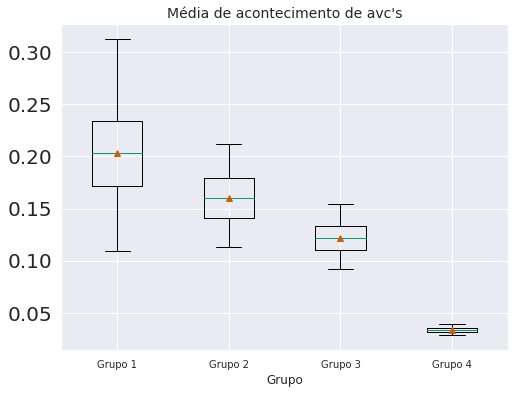

In [59]:
grupo1 = data[(data['heart_disease']==1) & (data['hypertension']==1)]
grupo2 = data[(data['heart_disease']==1) & (data['hypertension']==0) ]
grupo3 = data[(data['heart_disease']==0) & (data['hypertension']==1) ]
grupo4 = data[(data['heart_disease']==0) & (data['hypertension']==0) ]

col = 'stroke'
v1,v2,v3,v4 = bootstrap_mean(grupo1,grupo2,grupo3,grupo4,col)

bp_data = [v1, v2,v3,v4]

plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2,3,4], showfliers=False, showmeans=True)
plt.xticks([1,2,3,4], ['Grupo 1', 'Grupo 2','Grupo 3','Grupo 4'], fontsize=10)
plt.ylabel('', fontsize=13)
plt.xlabel('Grupo', fontsize=12)
plt.title('Média de acontecimento de avc\'s', fontsize=14)
plt.show()

Para negar H0 , basta acharmos algum grupo i,j tal que a media de pessoas que tiveram avc em i,j é diferente.
Usando a media do grupo 4 e do grupo 3 :

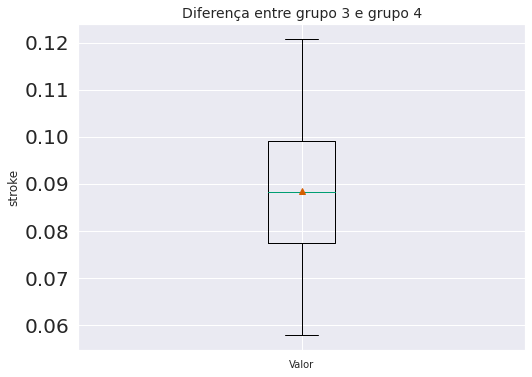

In [60]:
#calculando a diferença da média do grupo 3 e do grupo 4

def diff(arr1,arr2,n=10000):
  dif = np.zeros(n)
  for i in range(n):
    dif[i]=arr1[i]-arr2[i]
  return dif
dif = diff(v3,v4)

plt.rcParams['figure.figsize']  = (8, 6)
plt.boxplot(dif, whis=[2.5, 97.5], showfliers=False, showmeans=True)
plt.xticks([1], ['Valor'], fontsize=10)
plt.ylabel(col, fontsize=12)

plt.title('Diferença entre grupo 3 e grupo 4', fontsize=14)
plt.show()

Como a diferença entre o grupo 3 e o grupo 4 não possui o valor 0  entre 95% dos valores , podemos concluir que a media entre o grupo 3 e o grupo 4 podem ser consideradas diferentes, assim, H0 foi negada.

#Modelos de previsão

In [61]:
!pip install scikit-plot

In [62]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import linear_model
from sklearn.metrics import precision_score, make_scorer, f1_score, recall_score, accuracy_score
from scikitplot.estimators import plot_learning_curve
from sklearn.preprocessing import StandardScaler

# codigo com smote e algumas alterações sobre as observações
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

#imports dos algoritmos
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [63]:
continous_columns = ['age', 'avg_glucose_level', 'bmi']
df[continous_columns]=(df[continous_columns]-df[continous_columns].mean())/df[continous_columns].std()
df_cl = df
le = LabelEncoder()
df_cl.gender = le.fit_transform(df_cl.gender)
df_cl.ever_married = le.fit_transform(df_cl.ever_married)
df_cl.Residence_type = le.fit_transform(df_cl.Residence_type)

df_cl = pd.get_dummies(df_cl)
df_cl = df_cl.drop('id', axis = 1)
y = df_cl['stroke']
X = df_cl
X = X.drop('stroke', axis = 1)

sm = SMOTETomek(random_state=42)
X,y = sm.fit_resample(X, y.ravel())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=11,shuffle=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [64]:
tabela_comparativa = pd.DataFrame(columns=['Model Name','SMOTE','Precision','F1 Score','Accuracy','Recall'])

In [65]:
Y_pred = []

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1585
           1       0.77      0.85      0.81      1611

    accuracy                           0.80      3196
   macro avg       0.80      0.80      0.80      3196
weighted avg       0.80      0.80      0.80      3196

accuracy:  0.7959949937421777
recall:  0.8535071384233396
precision:  0.7677275265214963
f1:  0.8083480305702528


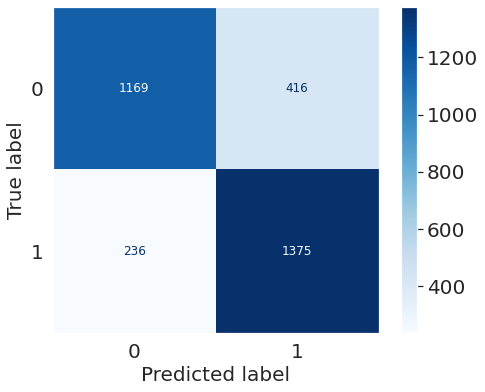

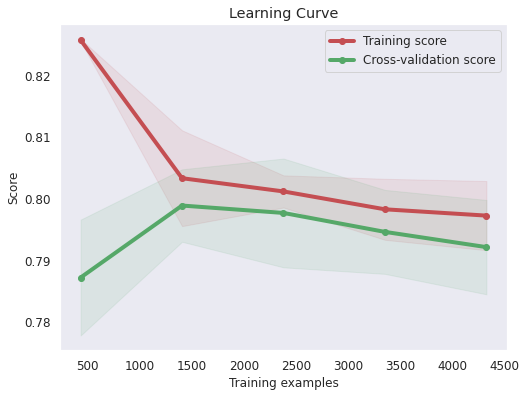

In [66]:
#Logistic Regression Classifier

model = LogisticRegressionCV(Cs=100,
                             fit_intercept=False,
                             cv=5,
                             max_iter=1000,
                             penalty='l2',
                             multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
Y_pred.append(model)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division = 1)
_precision = precision_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)
LRCV_coef=model.coef_
nova_linha = {'Model Name':'Logistic Regression Classifier','SMOTE':'1','Precision':_precision,'F1 Score':f1,'Accuracy':accuracy,'Recall':recall}
tabela_comparativa = tabela_comparativa.append(nova_linha, ignore_index=True)

print(classification_report(y_test, y_pred, zero_division = 1))
print('accuracy: ', accuracy)
print('recall: ',recall)
print('precision: ', _precision)
print('f1: ', f1)
    
    
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format = 'd');  
plt.grid(False)  
plt.show()
plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.92      0.94      1585
           1       0.93      0.97      0.95      1611

    accuracy                           0.95      3196
   macro avg       0.95      0.95      0.95      3196
weighted avg       0.95      0.95      0.95      3196

accuracy:  0.9461827284105131
recall:  0.9671011793916822
precision:  0.9290399522957663
f1:  0.9476885644768855


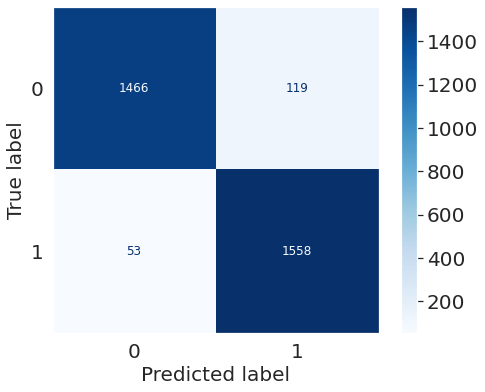

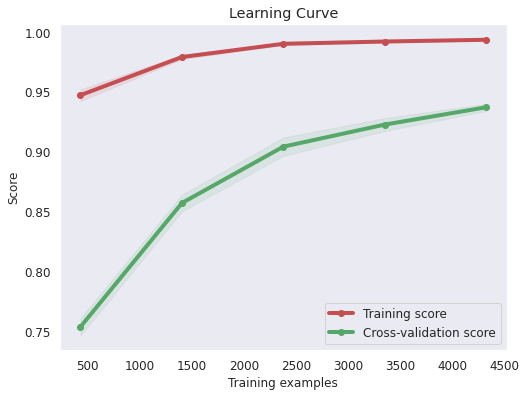

In [67]:
#Classifier implementing the k-nearest neighbors vote

skf = StratifiedKFold(n_splits=20, shuffle= True)

fold = 0
melhores = []
for treino, validacao in skf.split(X_train, y_train):
  X_tt = X_train[treino]
  y_tt = y_train[treino]
  X_v = X_train[validacao]
  y_v = y_train[validacao]
  best = (0, 0)
  for nn in [2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 100]:
    model = KNeighborsClassifier(n_neighbors=nn)
    model.fit(X_tt, y_tt)
    y_pv = model.predict(X_v)

    accuracy = accuracy_score(y_v, y_pv)
    if accuracy > best[0]:
      best = (accuracy, nn)

  melhores.append(best[1])
  fold +=1

unique, counts = np.unique(melhores, return_counts=True)
#Identifica melhor número de vizinhos
valorBK = 0;
bestK = 0; 
for i in range(len(counts)):
  if counts[i]>valorBK:
    valorBK = counts[i];
    bestK = i;
bestK = unique[bestK]

model = KNeighborsClassifier(n_neighbors=bestK)
model.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
Y_pred.append(model)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division = 1)
_precision = precision_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)

nova_linha = {'Model Name':'KNN','SMOTE':'1','Precision':_precision,'F1 Score':f1,'Accuracy':accuracy,'Recall':recall}
tabela_comparativa = tabela_comparativa.append(nova_linha, ignore_index=True)


print(classification_report(y_test, y_pred, zero_division = 1))
print('accuracy: ', accuracy)
print('recall: ',recall)
print('precision: ', _precision)
print('f1: ', f1)
    
    
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format = 'd');  
plt.grid(False)  
plt.show()
plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1585
           1       0.93      0.98      0.95      1611

    accuracy                           0.95      3196
   macro avg       0.95      0.95      0.95      3196
weighted avg       0.95      0.95      0.95      3196

accuracy:  0.9518147684605757
recall:  0.9751707014276847
precision:  0.9323442136498516
f1:  0.9532766990291263


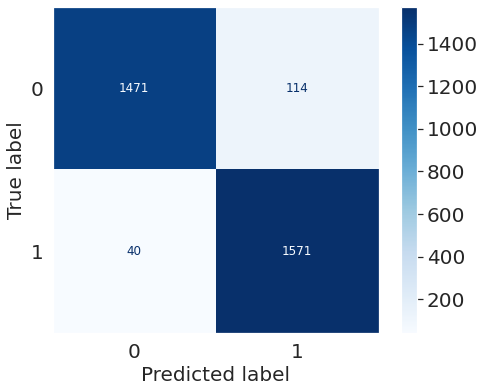

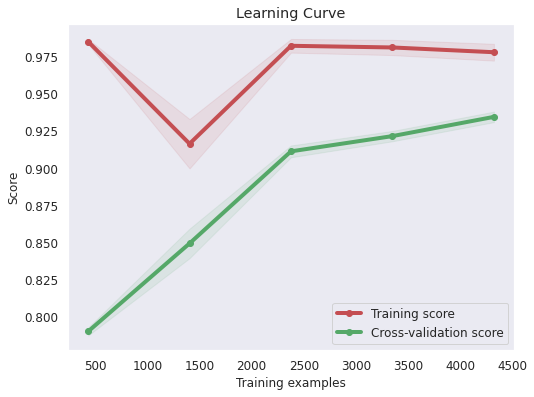

In [68]:
#MLPClassifier

from sklearn.metrics import confusion_matrix
model= MLPClassifier(max_iter=4500)
model.fit(X_train, y_train)
#print('Accuracy of {} classifier on test set: {:.2f}'.format(i,model.score(X_test, y_test)))
print(classification_report(y_test, model.predict(X_test), zero_division = 1))
confusion_matrix = confusion_matrix(y_test, model.predict(X_test))
y_pred = model.predict(X_test)
Y_pred.append(model)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division = 1)
_precision = precision_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)

nova_linha = {'Model Name':'MLPClassifier','SMOTE':'1','Precision':_precision,'F1 Score':f1,'Accuracy':accuracy,'Recall':recall}
tabela_comparativa = tabela_comparativa.append(nova_linha, ignore_index=True)

print('accuracy: ', accuracy)
print('recall: ',recall)
print('precision: ', _precision)
print('f1: ', f1)
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format = 'd');  
plt.grid(False)  
plt.show()
plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1585
           1       0.92      0.91      0.92      1611

    accuracy                           0.92      3196
   macro avg       0.92      0.92      0.92      3196
weighted avg       0.92      0.92      0.92      3196

accuracy:  0.9192740926157698
recall:  0.9143389199255121
precision:  0.9246704331450094
f1:  0.9194756554307115


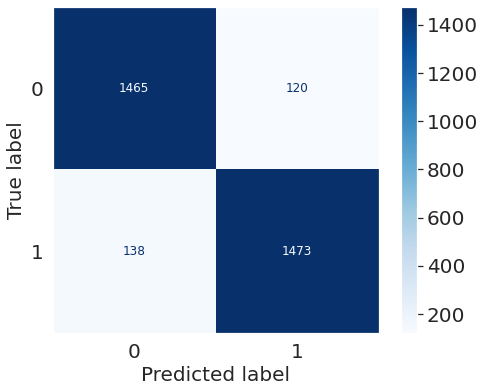

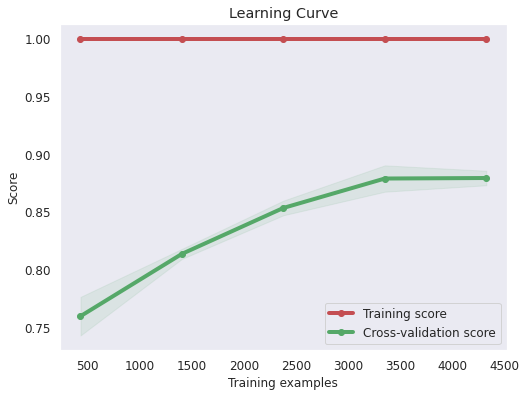

In [69]:
#Decision Tree Classifier

from sklearn.metrics import confusion_matrix
model= DecisionTreeClassifier()
model.fit(X_train, y_train)
#print('Accuracy of {} classifier on test set: {:.2f}'.format(i,model.score(X_test, y_test)))
print(classification_report(y_test, model.predict(X_test), zero_division = 1))
confusion_matrix = confusion_matrix(y_test, model.predict(X_test))
y_pred = model.predict(X_test)
Y_pred.append(model)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division = 1)
_precision = precision_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)

nova_linha = {'Model Name':'Decision Tree Classifier','SMOTE':'1','Precision':_precision,'F1 Score':f1,'Accuracy':accuracy,'Recall':recall}
tabela_comparativa = tabela_comparativa.append(nova_linha, ignore_index=True)

print('accuracy: ', accuracy)
print('recall: ',recall)
print('precision: ', _precision)
print('f1: ', f1)

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format = 'd');  
plt.grid(False)  
plt.show()
plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1585
           1       0.84      0.92      0.88      1611

    accuracy                           0.87      3196
   macro avg       0.88      0.87      0.87      3196
weighted avg       0.88      0.87      0.87      3196

accuracy:  0.8745306633291614
recall:  0.9199255121042831
precision:  0.8449258836944128
f1:  0.8808320950965826


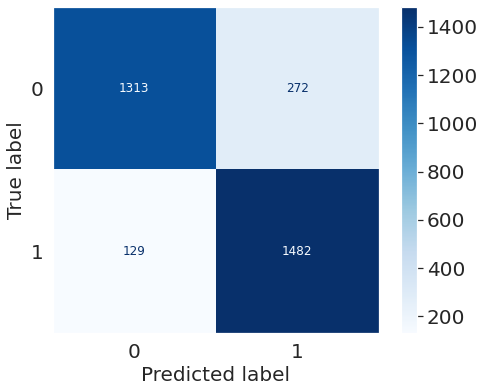

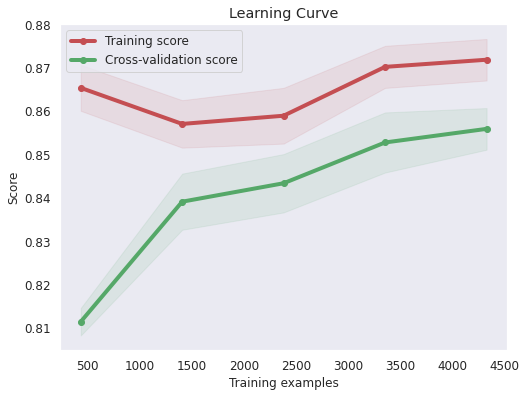

In [70]:
#SVC

from sklearn.metrics import confusion_matrix
model= svm.SVC()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test), zero_division = 1))
confusion_matrix = confusion_matrix(y_test, model.predict(X_test))
y_pred = model.predict(X_test)
Y_pred.append(model)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division = 1)
_precision = precision_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)

nova_linha = {'Model Name':'SVC','SMOTE':'1','Precision':_precision,'F1 Score':f1,'Accuracy':accuracy,'Recall':recall}
tabela_comparativa = tabela_comparativa.append(nova_linha, ignore_index=True)

print('accuracy: ', accuracy)
print('recall: ',recall)
print('precision: ', _precision)
print('f1: ', f1)

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format = 'd');  
plt.grid(False)  
plt.show()
plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1585
           1       0.78      0.83      0.80      1611

    accuracy                           0.79      3196
   macro avg       0.80      0.79      0.79      3196
weighted avg       0.79      0.79      0.79      3196

accuracy:  0.7934918648310388
recall:  0.8305400372439479
precision:  0.7756521739130435
f1:  0.802158273381295


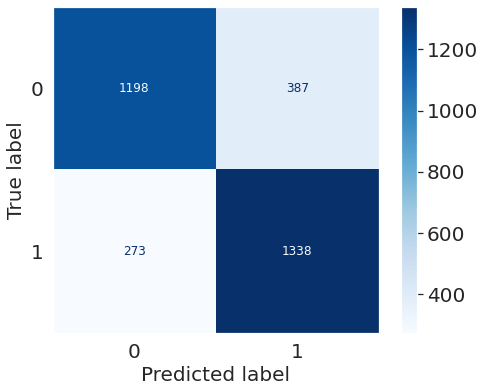

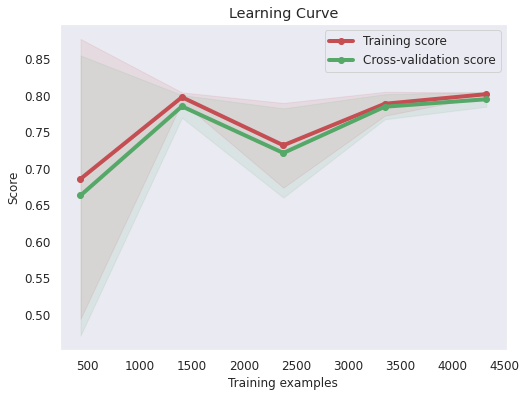

In [71]:
# SGDClassifier

from sklearn.metrics import confusion_matrix
model= SGDClassifier()
model.fit(X_train, y_train)
print(classification_report(y_test, model.predict(X_test), zero_division = 1))
confusion_matrix = confusion_matrix(y_test, model.predict(X_test))
y_pred = model.predict(X_test)
Y_pred.append(model)
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, zero_division = 1)
_precision = precision_score(y_test, y_pred, zero_division = 1)
f1 = f1_score(y_test, y_pred, zero_division = 1)

SGDC_coef=model.coef_
nova_linha = {'Model Name':'SGDClassifier','SMOTE':'1','Precision':_precision,'F1 Score':f1,'Accuracy':accuracy,'Recall':recall}
tabela_comparativa = tabela_comparativa.append(nova_linha, ignore_index=True)

print('accuracy: ', accuracy)
print('recall: ',recall)
print('precision: ', _precision)
print('f1: ', f1)

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format = 'd');  
plt.grid(False)  
plt.show()
plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
plt.show()

accuracy:  0.9411764705882353
recall:  0.9068901303538175
precision:  0.9746497665110073
f1:  0.9395498392282958
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1585
           1       0.97      0.91      0.94      1611

    accuracy                           0.94      3196
   macro avg       0.94      0.94      0.94      3196
weighted avg       0.94      0.94      0.94      3196



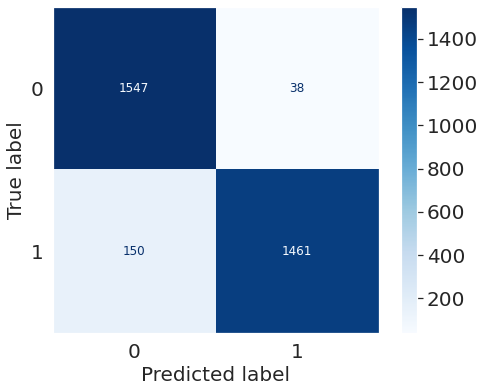

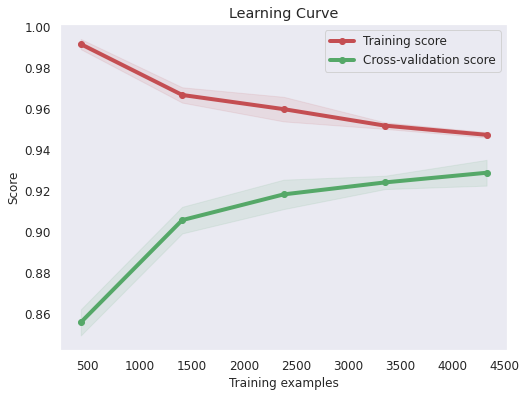

In [72]:
#XGBClassifier

from sklearn.metrics import confusion_matrix
model= xgb.XGBClassifier(n_estimators = 500, max_depth=2, random_state=2021, use_label_encoder=False, eval_metric='mlogloss')
X_train_x = np.array(X_train)
y_train_x = np.array(y_train)
model.fit(X_train_x, y_train_x)
X_test_x = np.array(X_test)
y_test_x = np.array(y_test)
confusion_matrix = confusion_matrix(y_test_x, model.predict(X_test_x))
y_pred = model.predict(X_test_x)
Y_pred.append(model)
accuracy = accuracy_score(y_test_x, y_pred)
recall = recall_score(y_test_x, y_pred, zero_division = 1)
_precision = precision_score(y_test_x, y_pred, zero_division = 1)
f1 = f1_score(y_test_x, y_pred, zero_division = 1)

nova_linha = {'Model Name':'XGBClassifier','SMOTE':'1','Precision':_precision,'F1 Score':f1,'Accuracy':accuracy,'Recall':recall}
tabela_comparativa = tabela_comparativa.append(nova_linha, ignore_index=True)

print('accuracy: ', accuracy)
print('recall: ',recall)
print('precision: ', _precision)
print('f1: ', f1)
print(classification_report(y_test, y_pred, zero_division = 1))

plot_confusion_matrix(model, X_test_x, y_test_x, cmap='Blues', values_format = 'd');  
plt.grid(False)  
plt.show()
plot_learning_curve(model, X_train, y_train, cv=3, scoring='f1');    
plt.show()

In [73]:
tabela_comparativa.head(50)

,Model Name,SMOTE,Precision,F1 Score,Accuracy,Recall
0,Logistic Regression Classifier,1,0.767728,0.808348,0.795995,0.853507
1,KNN,1,0.929040,0.947689,0.946183,0.967101
2,MLPClassifier,1,0.932344,0.953277,0.951815,0.975171
3,Decision Tree Classifier,1,0.924670,0.919476,0.919274,0.914339
4,SVC,1,0.844926,0.880832,0.874531,0.919926
5,SGDClassifier,1,0.775652,0.802158,0.793492,0.830540
6,XGBClassifier,1,0.974650,0.939550,0.941176,0.906890


In [74]:
X_test_df = pd.DataFrame(X_test, columns=['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16'])
X_test_df['f17']= y_test

def bootstrap_test():
    N = 500
    size = len(X_test_df)
    size2 = len(Y_pred)
    values = np.empty([N,size2])

    for i in range(N):
        sample1 = X_test_df.sample(size, replace=True,axis=0, random_state=i)
        y_test = sample1['f17']
        sample1 = sample1.drop('f17', axis = 1)
        for j in range(size2):
            y_pred = Y_pred[j].predict(sample1)
            f1 = f1_score(y_test, y_pred, zero_division = 1)
            values[i][j]=f1;
        
    return values

v1 = bootstrap_test()


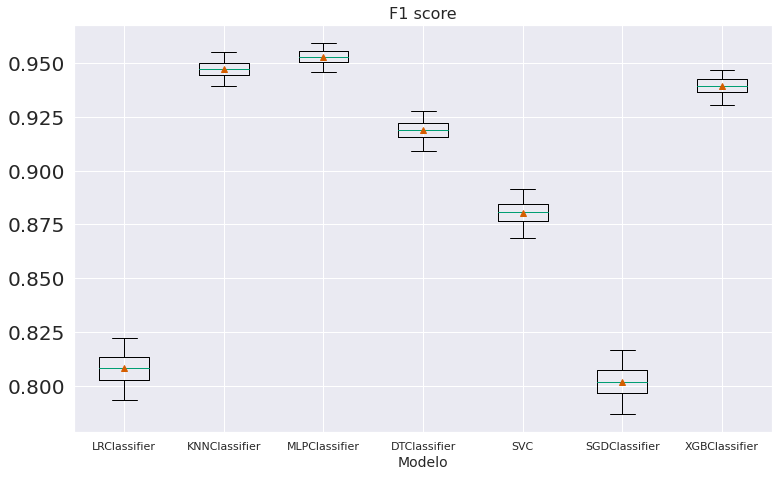

In [75]:
bp_data = [v1[:,0], v1[:,1], v1[:,2], v1[:,3], v1[:,4], v1[:,5], v1[:,6]]

plt.rcParams['figure.figsize']  = (12.5, 7.5)
plt.boxplot(bp_data, whis=[2.5, 97.5], positions=[1,2,3,4,5,6,7], showfliers=False, showmeans=True)
plt.xticks([1,2,3,4,5,6,7], ['LRClassifier', 'KNNClassifier','MLPClassifier','DTClassifier', 'SVC', 'SGDClassifier', 'XGBClassifier'], fontsize=11)
plt.ylabel('', fontsize=13)
plt.xlabel('Modelo', fontsize=14)
plt.title('F1 score', fontsize=16)
plt.show()

##  Relação dos coeficientes e das hipoteses

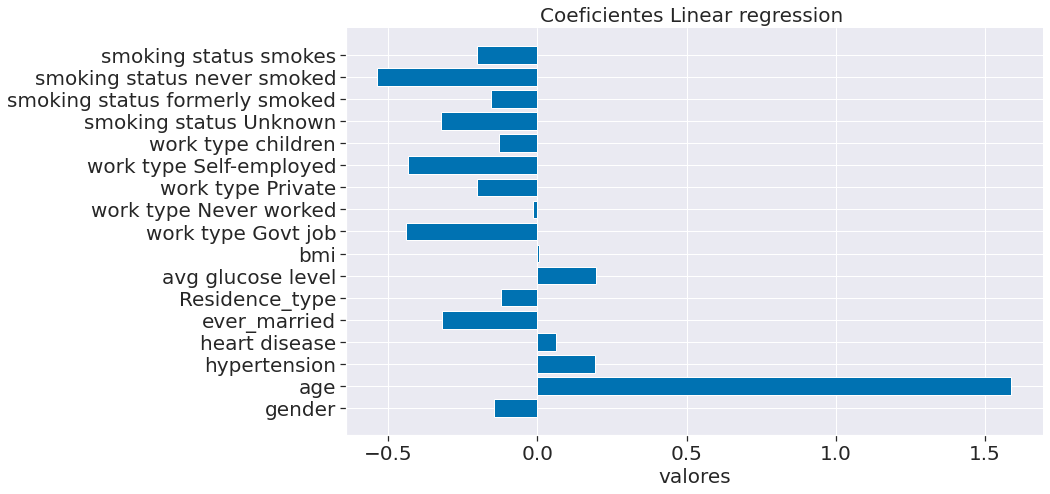

In [76]:
lab=[	"gender"	,"age"	,"hypertension",	"heart disease",	"ever_married"	,"Residence_type"	,"avg glucose level"	,"bmi",
		"work type Govt job",	"work type Never worked"	,"work type Private",	"work type Self-employed"	,"work type children",	"smoking status Unknown",
  	"smoking status formerly smoked",	"smoking status never smoked","smoking status smokes" ]
plt.barh(lab,LRCV_coef[0])
plt.title('Coeficientes Linear regression ')
despine()
plt.xlabel('Coeficiente')
plt.xlabel('valores' )
plt.yticks() 

plt.show()




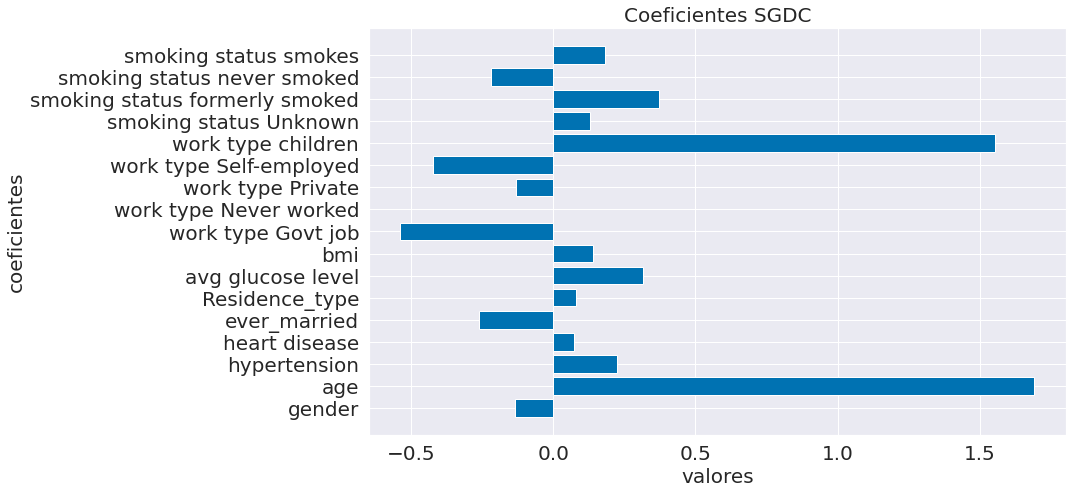

In [77]:
lab=[	"gender"	,"age"	,"hypertension",	"heart disease",	"ever_married"	,"Residence_type"	,"avg glucose level"	,"bmi",
		"work type Govt job",	"work type Never worked"	,"work type Private",	"work type Self-employed"	,"work type children",	"smoking status Unknown",
  	"smoking status formerly smoked",	"smoking status never smoked","smoking status smokes" ]
plt.barh(lab,SGDC_coef[0])
plt.title('Coeficientes SGDC')
plt.xlabel('valores')
plt.ylabel('coeficientes' )

plt.show()

## Relação com o teste de hipóteses 'Pessoas que fumam ou já fumaram apresentam média de AVC igual a pessoas que nunca fumaram?"

Nesse teste de hipotese , chegamos a conclusao que como a hipotese nula não foi rejeitada, não podemos afirmar que pessoas que fumam ou já fumaram apresentam média de AVC igual a pessoas que nunca fumaram. E os coeficientes reafirmam isso, podemos perceber que , em ambos os graficos de coeficientes ,os coeficientes relacionados a fumar influenciam mais a predição de AVC do que aqueles relacionados a não fumar".


## Relação com o teste de hipóteses 'Homens na meia idade apresentam em média maior propensão a AVC do que mulheres?'

Para este teste de hipóteses concluimos que como a hipótese nula não foi rejeitada, não podemos afirmar que indivíduos do gênero masculino de faixa etária média apresentam, em média, maior propensão a AVC ao se comparar com o gênero oposto. E apesar desse teste de hipoteses considerar somente homems de meia idade, podemos perceber nos coeficientes que o genêro de fato influencia pouco na incidência de AVCs.

##Relação com o teste de hipóteses 'Pessoas com índices glicêmicos elevado tem maior probabilidade de sofrer um AVC comparado com pessoas com glicemia normal ?'
Como a hipótese nula foi rejeitada, pessoas com índices glicêmicos maior que 100 possuem maior probabilidade de sofrer um AVC comparado com pessoas com glicemia menor que 100. Nos gráficos de coeficientes podemos perceber que o indice glicêmico influencia positivamente a classificação de um individuo para o acontecimento de um AVC.
